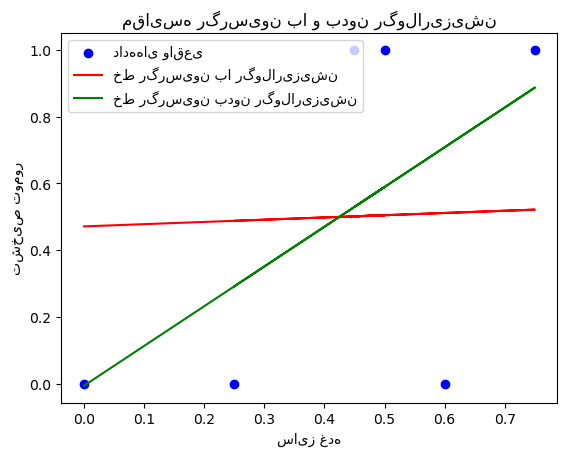

معادله رگرسیون با رگولاریزیشن: y = 0.06688963210702326 x + 0.47157190635451535
معادله رگرسیون بدون رگولاریزیشن: y = 1.1887495934141064 x + -0.00493803040910024


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# تعریف داده‌ها
X = np.array([0.25, 0.5, 0.45, 0.75, 0.6, 0]).reshape(-1, 1)
y = np.array([0, 1, 1, 1, 0, 0])

# اضافه کردن ستون بایاس به X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# پارامترها
alpha = 0.1  # نرخ یادگیری
n_iterations = 1000  # تعداد تکرارها
lambda_reg = 1.0  # مقدار رگولاریزیشن
m = len(y)  # تعداد نمونه‌ها

# مقداردهی اولیه وزن‌ها
theta1 = np.random.randn(2, 1)
theta2 = np.random.randn(2, 1)


#  تابع هزینه با رگولاریزیشن
def compute_cost(X_b, y, theta1, lambda_reg):
    predictions1 = X_b.dot(theta1)
    cost1 = (1/(m)) * np.sum((predictions1 - y)**2) + (lambda_reg) * np.sum(theta1[1:]**2)
    return cost1

# تابع هزینه بدون رگولاریزیشن
def compute_cost_no_reg(X_b, y, theta2):
    predictions2 = X_b.dot(theta2)
    cost2 = (1 / (m)) * np.sum((predictions2 - y) ** 2)
    return cost2

# گرادیان کاهشی با رگولاریزیشن
for iteration in range(n_iterations):
    gradients1 = (1/m) * X_b.T.dot(X_b.dot(theta1) - y.reshape(-1, 1)) + (lambda_reg) * np.r_[[[0]], theta1[1:]]
    theta1 = theta1 - alpha * gradients1


# گرادیان کاهشی بدون رگولاریزیشن
for iteration in range(n_iterations):
    gradients2 = (1/m) * X_b.T.dot(X_b.dot(theta2) - y.reshape(-1, 1))
    theta2 = theta2 - alpha * gradients2


# وزن‌ها و بایاس مدل با رگولاریزیشن
b_with_reg = theta1[0, 0]
w_with_reg = theta1[1, 0]

# وزن‌ها و بایاس مدل بدون رگولاریزیشن
b_no_reg = theta2[0, 0]
w_no_reg = theta2[1, 0]


# محاسبه و رسم خط رگرسیون با رگولاریزیشن
y_pred_with_reg = X_b.dot(theta1)

# محاسبه و رسم خط رگرسیون بدون رگولاریزیشن
y_pred_no_reg = X_b.dot(theta2)


# رسم هر دو خط رگرسیون در یک نمودار
plt.scatter(X, y, color='blue', label='داده‌های واقعی')
plt.plot(X, y_pred_with_reg, color='red', label='خط رگرسیون با رگولاریزیشن')
plt.plot(X, y_pred_no_reg, color='green', label='خط رگرسیون بدون رگولاریزیشن')
plt.xlabel('سایز غده')
plt.ylabel('تشخیص تومور')
plt.legend()
plt.title('مقایسه رگرسیون با و بدون رگولاریزیشن')
plt.show()

print("معادله رگرسیون با رگولاریزیشن: y =", w_with_reg, "x +", b_with_reg)
print("معادله رگرسیون بدون رگولاریزیشن: y =", w_no_reg, "x +", b_no_reg)

# plt.scatter(X, y, color='blue', label='داده‌های واقعی')
# plt.plot(X, y_pred_with_reg, color='red', label='خط رگرسیون با رگولاریزیشن')
# plt.xlabel('سایز غده')
# plt.ylabel('تشخیص تومور')
# plt.legend()
# plt.title(f'رگرسیون با رگولاریزیشن')
# plt.show()

# print("معادله رگرسیون با رگولاریزیشن: y =", w_with_reg, "x +", b_with_reg)



# plt.scatter(X, y, color='blue', label='داده‌های واقعی')
# plt.plot(X, y_pred_no_reg, color='green', label='خط رگرسیون بدون رگولاریزیشن')
# plt.xlabel('سایز غده')
# plt.ylabel('تشخیص تومور')
# plt.legend()
# plt.title(f'رگرسیون بدون رگولاریزیشن')
# plt.show()

# print("معادله رگرسیون بدون رگولاریزیشن: y =", w_no_reg, "x +", b_no_reg)
